In [1]:
import pandas
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pandas.read_csv('tagdata.csv')

In [4]:
# preformat data

tagcolumns = data.columns.difference(['ID', 'Name', 'Unnamed: 0', 'Unnamed: 3'])
tagcounts = dict(np.sum(data[tagcolumns], 0))
sorteditems = sorted(tagcounts.items(), key=lambda x: -x[1])
tags, counts = list(zip(*sorteditems))

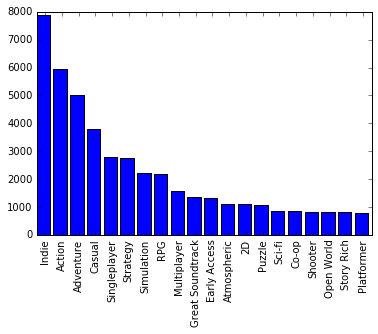

In [5]:
# print top 8 tags with occurences

topN = 20
plt.bar(np.arange(topN), counts[:topN])
plt.xticks(np.arange(0.5, topN + 0.5), tags[:topN], rotation=90)
plt.show()

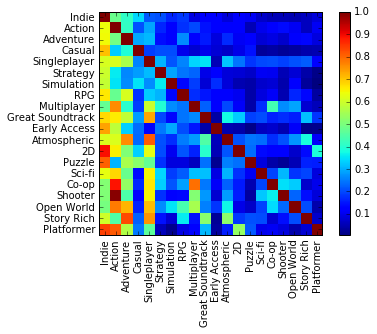

In [6]:
# A map that shows in each row, which percentage of tag contains also tag2

topN = 20
top_data = data[list(tags[:topN])]

total = top_data.shape[0]
tag_grid = np.zeros([topN, topN])
for i, tag in enumerate(tags[:topN]):
    for j, tag2 in enumerate(tags[:topN]):
        tag_grid[i, j] = sum(map(lambda x, y: x and y, top_data[tag] == True, top_data[tag2] == True))
        tag_grid[i, j] /= sum(top_data[tag])
        
plt.imshow(tag_grid, interpolation='nearest')
plt.colorbar()
plt.xticks(range(0, topN), tags[:topN], rotation=90)
plt.yticks(range(0, topN), tags[:topN])
plt.show()

In [8]:
plt.savefig('test.png')

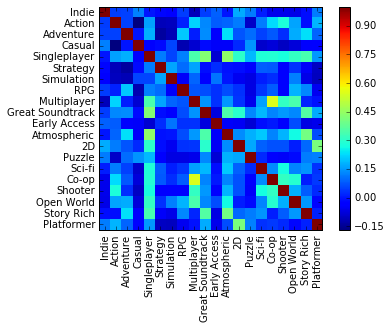

In [9]:
# CORRELATION MATRIX

corr = top_data.corr()
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.xticks(range(0, topN), tags[:topN], rotation=90)
plt.yticks(range(0, topN), tags[:topN])
plt.show()

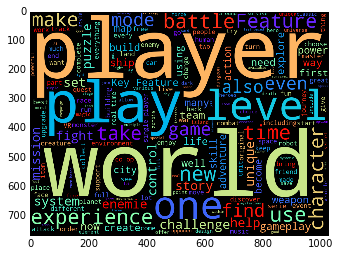

In [10]:
from wordcloud import WordCloud, STOPWORDS
import re

data = pandas.read_csv("basic.csv")
data = data.fillna('')

stopwords = set(STOPWORDS)
stopwords.add('game')
stopwords.add('will')

puretext = ' '.join(map(lambda x: str(x), data['LongDesc'].tolist()))
for regex in ['&[^&;]*;', 'quot;', '<[^<>*]*>']:
    puretext = re.sub(regex, ' ', puretext)

cloud = WordCloud(width=1024, height=768, colormap="rainbow", stopwords=stopwords)
cloud.generate_from_text(puretext)
cloud.to_image().show()
cloud.to_image().save('longdescmap.png')
# also show in notebook
plt.imshow(cloud, interpolation='bilinear')
plt.show()

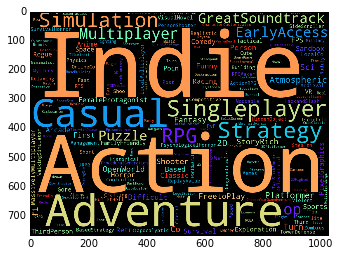

In [11]:
tags = data['Tags']
tags_as_text = ' '.join((map(lambda s: s.replace(' ', '').replace(';', ' '), tags)))
cloud = WordCloud(width=1024, height=768, colormap='rainbow', collocations=False)
cloud.generate(tags_as_text)
# cloud.to_image().show()
cloud.to_image().save('tagmap.png')
plt.imshow(cloud, interpolation='bilinear')
plt.show()